# Group Project 1 - Team Adolphe Quételet
### Team Members: Lara Gursoy(Project Manager), Jibin Qiu, Yingyin Li, Levi Ding, Qianhao Zhong

<br>

## **1. Project Goal:**

> __Our team is embarking on a comprehensive analysis of the global impact of the COVID-19 pandemic on the world's population. Our primary focus is centered on meticulously examining the mortality rates across various countries and diverse population groups, spanning the years from 2019 to 2022. With a profound commitment to uncovering the narratives concealed within the data, our analytical approach seeks to unveil the nuanced stories that emerge from this critical period of examination.__

<br>

## **2. Data Description:**

> **For this project, we are going to use [World Bank Group (wbdata)](https://wbdata.readthedocs.io/en/stable/), which is a simple Python interface to find and request information from the World Bank’s various databases. It can return data either as a dictionary containing full metadata or as a pandas DataFrame.**

> **Subgroups of Population and key variables:**
> * **Genders: Male, Female**
> * **Ages: 0-13, 14-17, 18-24, 25-44, 45-79, 80>=**
> * **Countries: World, US, China, Russia, India, French, UK**
> * **Years: 2019-2022**
> * **Mortality rate within different countries and the world**

<br>

## **3. Project Deliverables:**

### **[A] Data Import:**

In [493]:
%pip install wbdata
%pip install cufflinks
%pip install geopandas matplotlib

import wbdata
import pandas as pd
import cufflinks as cf
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.offline as py
import geopandas as gpd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [413]:
# Indicator Info
wbdata.get_indicator(source= 40)

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

In [530]:
# Country Info
wbdata.get_country()
# wbdata.get_country()[0]["id"]

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

### **[A] Population Statistics:**

In [415]:
# This is a function used to answer the following question: 
# In [year] how many [people/males/females] aged [low] to [high] were living in [the world/region/country]?
def population(gender, year, age_range, country):
    if str(gender).lower() == "male":
        sex = "MA"
    elif str(gender).lower() == "female":
        sex = "FE"
    range_0 = len(wbdata.get_data("SP.POP." + str(age_range) + "." + sex, country = [str(country)]))
    for index in range(0, range_0):
        if wbdata.get_data("SP.POP." + str(age_range) + "." + sex, country = [str(country)])[index]["date"] == str(year):
            population_stat = wbdata.get_data("SP.POP." + str(age_range) + "." + sex, country = [str(country)])[index]["value"]
            break
    return population_stat

# User Input:
user_gender = input("Please provide gender (type male or female): ")
user_year = input("Please provide year (choose between 1960 and 2022): ")
user_age_range = input("Please provide age range (e.g. 0004, 5054): ")
user_country = input("Please provide country (use capitalized abbreviation): ")

pop_stat = population(user_gender, user_year, user_age_range, user_country)
print("\t")
print("In " + user_year + ", there were " + str(pop_stat) + " " + user_gender + "s in the age group of " + user_age_range + " in " + user_country + ".")

Please provide gender (type male or female): male
Please provide year (choose between 1960 and 2022): 2022
Please provide age range (e.g. 0004, 5054): 5054
Please provide country (use capitalized abbreviation): USA
	
In 2022, there were 10509614 males in the age group of 5054 in USA.


In [503]:
# Manual test on population() function
wbdata.get_data("SP.POP.0004.MA", country=["CHN"])  
# wbdata.get_data("SP.POP.0004.MA", country=["CHN"])[0]["country"]["value"]

[{'indicator': {'id': 'SP.POP.0004.MA',
   'value': 'Population ages 00-04, male'},
  'country': {'id': 'CN', 'value': 'China'},
  'countryiso3code': 'CHN',
  'date': '2022',
  'value': 35331403,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.0004.MA',
   'value': 'Population ages 00-04, male'},
  'country': {'id': 'CN', 'value': 'China'},
  'countryiso3code': 'CHN',
  'date': '2021',
  'value': 39330381,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.0004.MA',
   'value': 'Population ages 00-04, male'},
  'country': {'id': 'CN', 'value': 'China'},
  'countryiso3code': 'CHN',
  'date': '2020',
  'value': 42672144,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.0004.MA',
   'value': 'Population ages 00-04, male'},
  'country': {'id': 'CN', 'value': 'China'},
  'countryiso3code': 'CHN',
  'date': '2019',
  'value': 45151398,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator

In [417]:
variable_labels = {"SP.POP.TOTL":"World Population", "SP.DYN.AMRT.FE":"Mortality rate adult female"}

world = wbdata.get_dataframe(variable_labels, country="WLD")

# Date index is of type string; change to integers
world.index = world.index.astype(int)

# Print a few years' data
world.head()

,World Population,Mortality rate adult female
date,,
2022,7.950947e+09,NaN
2021,7.888306e+09,138.473422
2020,7.820206e+09,119.449662
2019,7.741775e+09,111.119110
2018,7.660371e+09,112.376014


### **[A] Unit tests:**

In [443]:
# test will pass if it doesn't have output
assert population(gender = "male", year = str(2022), age_range = "0004", country = "CHN"), "35331403"

### **[A] Population DataFrames:**
### **_<u>DataFrame I: Male and Female Population within Different Age Intervals from 2015 to 2022 (USA VS. WLD)_**

In [419]:
indicators = {"SP.POP.6064.FE":"Population ages 60-65, female",
               "SP.POP.6064.MA":"Population ages 60-64, male",
               "SP.POP.6569.FE":"Population ages 65-69, female",
               "SP.POP.6569.MA":"Population ages 65-69, male",
               "SP.POP.7074.FE":"Population ages 70-74, female",
               "SP.POP.7074.MA":"Population ages 70-74, male",
               "SP.POP.7579.FE":"Population ages 75-79, female",
               "SP.POP.7579.MA":"Population ages 75-79, male",
               "SP.POP.80UP.FE":"Population ages 80 and above, female",
               "SP.POP.80UP.MA":"Population ages 80 and above, male"}


data = wbdata.get_dataframe(indicators, country=['USA', 'WLD'])


# Make years ints instead of strings
data.reset_index(inplace=True)


selected_years = ["2015","2016","2017","2018",'2019', '2020', '2021', '2022']
data = data[data['date'].isin(selected_years)]
data.set_index(['country','date'],inplace=True)
data.sort_index(ascending=True, inplace=True)
data

Population ages 60-65, female  \
country       date                                  
United States 2015                      9956969.0   
              2016                     10157117.0   
              2017                     10241524.0   
              2018                     10435807.0   
              2019                     10564689.0   
              2020                     10724223.0   
              2021                     10788833.0   
              2022                     10828271.0   
World         2015                    151285055.0   
              2016                    155564979.0   
              2017                    159387746.0   
              2018                    162763505.0   
              2019                    164706399.0   
              2020                    165529683.0   
              2021                    165964011.0   
              2022                    167689827.0   

                    Population ages 60-64, male  \
country       date                                
United States 2015                    9262609.0   
              2016                    9495289.0   
              2017                    9603555.0   
              2018                    9835834.0   
              2019                   10001191.0   
              2020                   10175797.0   
              2021                   10227073.0   
              2022                   10240539.0   
World         2015                  140492250.0   
              2016                  144543021.0   
              2017                  148230974.0   
              2018                  151573109.0   
              2019                  153561526.0   
              2020                  154440614.0   
              2021                  154831185.0   
              2022                  156526287.0   

                    Population ages 65-69, female  \
country       date                                  
United States 2015                      8041966.0   
              2016                      8357596.0   
              2017                      8574778.0   
              2018                      8691035.0   
              2019                      9015729.0   
              2020                      9509650.0   
              2021                      9674037.0   
              2022                      9747250.0   
World         2015                    114998466.0   
              2016                    121180717.0   
              2017                    126815268.0   
              2018                    132160154.0   
              2019                    137213596.0   
              2020                    141960156.0   
              2021                    145667772.0   
              2022                    148749045.0   

                    Population ages 65-69, male  \
country       date                                
United States 2015                    7140032.0   
              2016                    7424089.0   
              2017                    7677258.0   
              2018                    7848388.0   
              2019                    8171594.0   
              2020                    8649904.0   
              2021                    8817967.0   
              2022                    8889134.0   
World         2015                  103024485.0   
              2016                  108296391.0   
              2017                  113103534.0   
              2018                  117695493.0   
              2019                  122077328.0   
              2020                  126205526.0   
              2021                  129374440.0   
              2022                  132124387.0   

                    Population ages 70-74, female  \
country       date                                  
United States 2015                      5903399.0   
              2016                      6201121.0   
              2017                      6638861.0   
       

### **_<u>DataFrame II: Male and Female Populations Aged 19 to 65 (adults) from 2015 to 2020 (USA)_**

In [420]:
# Create DataFrame Basics
list_index_before = 0
list_index_post = 6
list_index_before_Male = 0
list_index_post_Male = 6
pop_15 = 0
pop_16 = 0
pop_17 = 0
pop_18 = 0
pop_19 = 0
pop_20 = 0
pop_15_Male = 0
pop_16_Male = 0
pop_17_Male = 0
pop_18_Male = 0
pop_19_Male = 0
pop_20_Male = 0
FE_adult_list = []
MA_adult_list = []

# Female Adult Population from 2015 to 2020
age_before = 20
age_post = 24

population_adult_FE = []
population_adult_MA = []

while age_post in range(0, 66):
    age_before = age_post + 1
    age_post += 4 + 1
    age_str = str(age_before) + str(age_post)
    age_str = "SP.POP." + str(age_str) + ".FE"
    source = str(age_str)
    for index_1 in range(0, range_1):
        for year in range(2015, 2021):
            if wbdata.get_data(source, country=["USA"])[index_1]["date"] == str(year):
                population_adult_FE.append(wbdata.get_data(source, country=["USA"])[index_1]["value"])

while list_index_before in range(0, len(population_adult_FE)):
    six_ele_list_FE = population_adult_FE[list_index_before:(list_index_post)]
    list_index_before = list_index_post
    list_index_post += 6 
    pop_15 += six_ele_list_FE[0]
    pop_16 += six_ele_list_FE[1]
    pop_17 += six_ele_list_FE[2]
    pop_18 += six_ele_list_FE[3]
    pop_19 += six_ele_list_FE[4]
    pop_20 += six_ele_list_FE[5]
FE_adult_list.append(pop_15)
FE_adult_list.append(pop_16)
FE_adult_list.append(pop_17)
FE_adult_list.append(pop_18)
FE_adult_list.append(pop_19)
FE_adult_list.append(pop_20)

# Male Adult Population from 2015 to 2020
age_before = 20
age_post = 24

population_adult_MA = []
while age_post in range(0, 66):
    age_before = age_post + 1
    age_post += 4 + 1
    age_str = str(age_before) + str(age_post)
    age_str = "SP.POP." + str(age_str) + ".MA"
    source = str(age_str)
    for index_1 in range(0, range_1):
        for year in range(2015, 2021):
            if wbdata.get_data(source, country=["USA"])[index_1]["date"] == str(year):
                population_adult_MA.append(wbdata.get_data(source, country=["USA"])[index_1]["value"])

while list_index_before_Male in range(0, len(population_adult_MA)):
    six_ele_list_MA = population_adult_MA[list_index_before_Male:(list_index_post_Male)]
    list_index_before_Male = list_index_post_Male
    list_index_post_Male += 6 
    pop_15_Male += six_ele_list_MA[0]
    pop_16_Male += six_ele_list_MA[1]
    pop_17_Male += six_ele_list_MA[2]
    pop_18_Male += six_ele_list_MA[3]
    pop_19_Male += six_ele_list_MA[4]
    pop_20_Male += six_ele_list_MA[5]
MA_adult_list.append(pop_15_Male)
MA_adult_list.append(pop_16_Male)
MA_adult_list.append(pop_17_Male)
MA_adult_list.append(pop_18_Male)
MA_adult_list.append(pop_19_Male)
MA_adult_list.append(pop_20_Male)
    
year_list = [2015, 2016, 2017, 2018, 2019, 2020]
df_1 = pd.DataFrame({"Year": year_list, "US Male Adult (Age 19-65)": MA_adult_list, 'US Female Adult (Age 19-65)': FE_adult_list})
df_1.set_index('Year', inplace=True)
df_1

,US Male Adult (Age 19-65),US Female Adult (Age 19-65)
Year,,
2015,95132028,96096075
2016,94064916,95104779
2017,93491670,94703976
2018,92879280,94344428
2019,92173137,93883072
2020,91248062,93159270


### **[B] Population Pyramids:**

In [476]:
year_input = input("Please enter the year: ")
country_input = input("Please enter the country name: ")
male_population = []
female_population = []
age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
age_range = ['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579']

# Create Male List
for age_range_index in age_range:
    range_3 = len(wbdata.get_data("SP.POP." + str(age_range_index) + ".MA", country = [str(country_input)]))
    for index in range(0, range_3):
        if wbdata.get_data("SP.POP." + str(age_range_index) + ".MA", country = [str(country_input)])[index]["date"] == str(year_input):
            male_population.append(wbdata.get_data("SP.POP." + str(age_range_index) + ".MA", country = [str(country_input)])[index]["value"])
            break

# Create Female List
for age_range_index in age_range:
    range_3 = len(wbdata.get_data("SP.POP." + str(age_range_index) + ".FE", country = [str(country_input)]))
    for index in range(0, range_3):
        if wbdata.get_data("SP.POP." + str(age_range_index) + ".FE", country = [str(country_input)])[index]["date"] == str(year_input):
            female_population.append(wbdata.get_data("SP.POP." + str(age_range_index) + ".FE", country = [str(country_input)])[index]["value"])
            break

trace_male = go.Bar(
    x=male_population,
    y=age_groups,
    orientation='h',
    name='Male',
    marker=dict(color='green')
)


trace_female = go.Bar(
    x=[-x for x in female_population],
    y=age_groups,
    orientation='h',
    name='Female',
    marker=dict(color='maroon')
)


layout = go.Layout(
    barmode='overlay',
    title='Population Pyramid in ' + str(year_input) + " in " + str(country_input),
    xaxis=dict(title='Population'),
    yaxis=dict(title='Age Group')
)


fig = go.Figure(data=[trace_male, trace_female], layout=layout)
iplot(fig)


Please enter the year: 2020
Please enter the country name: USA


### **[C] Animated Population Pyramids:**

In [489]:
before_year = int(input("Please enter beginning year (should be divisible by 5): "))  # e.g. 2000, 2005, 2010, 2015 .......
post_year = int(input("Please enter ending year (should be divisible by 5): "))  # e.g. 2000, 2005, 2010, 2015 .......
year_range = range(post_year, before_year, -5)
country_input = str(input("Please enter the country name: "))

age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
age_range = ['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579']

def male_pop_func(year_chosen):
    male_population = []  
    for age_range_index in age_range:
        range_3 = len(wbdata.get_data("SP.POP." + str(age_range_index) + ".MA", country=[country_input]))
        for index in range(0, range_3):
            if wbdata.get_data("SP.POP." + str(age_range_index) + ".MA", country=[country_input])[index]["date"] == str(year_chosen):
                male_population.append(wbdata.get_data("SP.POP." + str(age_range_index) + ".MA", country=[country_input])[index]["value"])
                break
    return male_population

def female_pop_func(year_chosen):
    female_population = []  
    for age_range_index in age_range:
        range_3 = len(wbdata.get_data("SP.POP." + str(age_range_index) + ".FE", country=[country_input]))
        for index in range(0, range_3):
            if wbdata.get_data("SP.POP." + str(age_range_index) + ".FE", country=[country_input])[index]["date"] == str(year_chosen):
                female_population.append(wbdata.get_data("SP.POP." + str(age_range_index) + ".FE", country=[country_input])[index]["value"])
                break
    return female_population

bins = []
for year_chosen in year_range:
    male_data = male_pop_func(year_chosen)
    female_data = female_pop_func(year_chosen)

    # male
    bins.append(go.Bar(
        x=male_data,
        y=age_groups,
        orientation='h',
        name='Male {:d}'.format(year_chosen),
    ))

    # female
    bins.append(go.Bar(
        x=[-x for x in female_data],
        y=age_groups,
        orientation='h',
        name='Female {:d}'.format(year_chosen),
    ))

layout = go.Layout(
    barmode='overlay',
    title='Population Pyramid from ' + str(before_year) + " to " + str(post_year) + " in " + country_input,
    xaxis=dict(title='Population'),
    yaxis=dict(title='Age Group')
)

py.iplot(dict(data=bins, layout=layout))


Please enter beginning year (should be divisible by 5): 2000
Please enter ending year (should be divisible by 5): 2020
Please enter the country name: CHN


### **[C] Population Maps:**

Please provide year (choose between 1960 and 2022): 2022


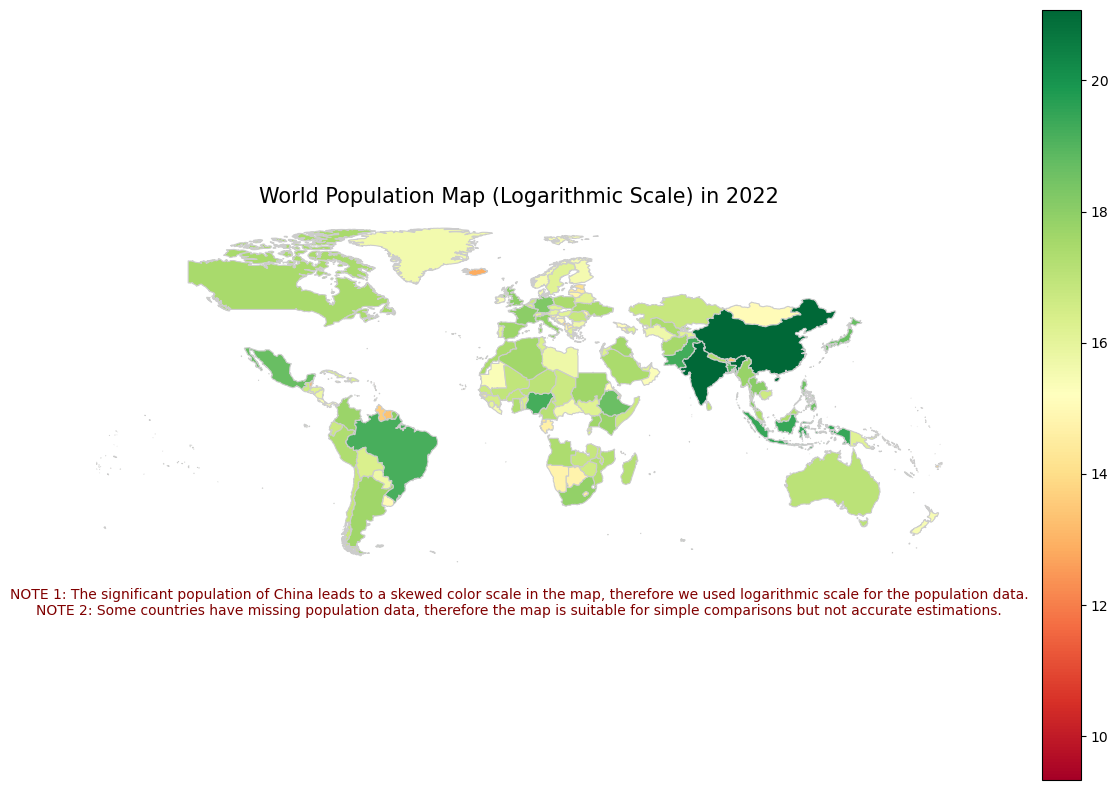

In [634]:
Country = []
Population = []
user_year = input("Please provide year (choose between 1960 and 2022): ")

def population_map(year, country):
    range_5 = len(wbdata.get_data("SP.POP.TOTL", country = [str(country)]))
    for index in range(0, range_5):
        if wbdata.get_data("SP.POP.TOTL", country = [str(country)])[index]["date"] == str(year):
            population_stat = wbdata.get_data("SP.POP.TOTL", country = [str(country)])[index]["value"]
            country_name = wbdata.get_data("SP.POP.TOTL", country = [str(country)])[index]["country"]["value"]
            break
    return population_stat, country_name

for country_index in range(0, int(len(wbdata.get_country()))):
    try:
        current_id = wbdata.get_country()[country_index]["id"]
        country_now = wbdata.get_country()[country_index]["name"]
        population_now = int(population_map(user_year, current_id)[0])
    except TypeError:
        population_now = 0
    Population.append(population_now)
    Country.append(country_now)

population_data = {
    'Country': Country,
    'Population': Population,
}
population_df = pd.DataFrame(population_data)


# shapefile_path = str(input("Provide file path of ne_50m_admin_0_countries.shp (which should be in the same location of this notebook): "))

# gdf = gpd.read_file("EEP_153_Adolphe_PROJ1/world_map_data/ne_50m_admin_0_countries.shp")

'''
ne_50m_admin_0_countries.dbf & ne_50m_admin_0_countries.shp & ne_50m_admin_0_countries.shx must be in 
the same location of notebook
'''

# gdf = gpd.read_file("ne_50m_admin_0_countries.dbf")  # Run this if .shp is not working
# gdf = gpd.read_file("ne_50m_admin_0_countries.shx")  # Run this if .shp is not working
gdf = gpd.read_file("ne_50m_admin_0_countries.shp")  # Must run

# Apply a logarithmic scale to the population data
population_df['Log_Population'] = np.log1p(population_df['Population'])

merged_df = gdf.merge(population_df, how='left', left_on='SOVEREIGNT', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='Log_Population', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('World Population Map (Logarithmic Scale) in ' + str(user_year), fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_axis_off()
notation_text = "NOTE 1: The significant population of China leads to a skewed color scale in the map, therefore we used logarithmic scale for the population data.\nNOTE 2: Some countries have missing population data, therefore the map is suitable for simple comparisons but not accurate estimations."
plt.annotate(notation_text, xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10, color='maroon')
plt.show()

### **[C] Other Visualization Tools:**
### **_<u>Visualization I: Male and Female Populations Age 0 to 14 (children) from 2015 to 2022 (USA)_**

In [424]:
indicators_2 = {"SP.POP.0014.FE.IN": "US Female Children (Age 0 to 14)",
             "SP.POP.0014.MA.IN": "US Male Children (Age 0 to 14)"}


data_USA_1 = wbdata.get_dataframe(indicators_2, country=['USA'])


data_USA_1.reset_index(inplace=True)
selected_years = ["2015","2016","2017","2018",'2019', '2020', '2021', '2022']
data_USA_1 = data_USA_1[data_USA_1['date'].isin(selected_years)]
data_USA_1.set_index(['date'],inplace=True)
data_USA_1.sort_index(ascending=True, inplace=True)
data_USA_1['US Female Children (Age 0 to 14)'] = data_USA_1['US Female Children (Age 0 to 14)'] / 10000000
data_USA_1['US Male Children (Age 0 to 14)'] = data_USA_1['US Male Children (Age 0 to 14)'] / 10000000

data_USA_1.iplot(title = 'Male and Female Populations Age 0 to 14 (children) from 2015 to 2022 (USA)', xTitle = 'Year', yTitle = 'Children Population (Millions)')


### **_<u>Visualization II: Male and Female Populations Aged 19 to 65 (adults) from 2015 to 2020 (USA)_**

In [425]:
cf.go_offline()
df_1 = pd.DataFrame({"Year": year_list, "US Male Adult (Age 19-65)": MA_adult_list, 'US Female Adult (Age 19-65)': FE_adult_list})
df_1.set_index('Year', inplace=True)
df_1['US Male Adult (Age 19-65)'] = df_1['US Male Adult (Age 19-65)'] / 10000000
df_1['US Female Adult (Age 19-65)'] = df_1['US Female Adult (Age 19-65)'] / 10000000
df_1.iplot(title = 'Male and Female Populations Aged 19 to 65 (adults) from 2015 to 2020 (USA)', xTitle = 'Year', yTitle = 'Adult Population (Millions)')


### **_<u>Visualization III: Male and Female Populations Aged 65 and Upper (elder people) from 2015 to 2022 (USA)_**

In [426]:
indicators_1 = {"SP.POP.65UP.FE.IN": "US Female Elder People (Age 65 and Upper)",
             "SP.POP.65UP.MA.IN": "US Male Elder People (Age 65 and Upper)"}


data_USA = wbdata.get_dataframe(indicators_1, country=['USA'])


data_USA.reset_index(inplace=True)
selected_years = ["2015","2016","2017","2018",'2019', '2020', '2021', '2022']
data_USA = data_USA[data_USA['date'].isin(selected_years)]
data_USA.set_index(['date'],inplace=True)
data_USA.sort_index(ascending=True, inplace=True)
data_USA['US Female Elder People (Age 65 and Upper)'] = data_USA['US Female Elder People (Age 65 and Upper)'] / 10000000
data_USA['US Male Elder People (Age 65 and Upper)'] = data_USA['US Male Elder People (Age 65 and Upper)'] / 10000000

data_USA.iplot(title = 'Male and Female Populations Aged 60 and Upper (elder people) from 2015 to 2022 (USA)', xTitle = 'Year', yTitle = 'Elder People Population (Millions)')


### **[C] Agricultural Supply:**

<br>

## **4. Presentation Link:**

<br>

## **5. Project Conclusion:**